# WOMEN'S HACK FOR SAFETY

## INTRODUCTION

South Africa has one of the highest crime rates in Africa, with approximately 2 million crimes reported every year. Women experience crime and are vulnerable to crime in different ways from men.

Let's build a machine learning model that predicts a woman’s level of risk of being victimized by a crime given 
basic information about her and her life.

<img src="GBV.jpg" style="width:680px;height:380px"/>

## DATA PREPARATION AND EXPLORATORY ANALYSIS

### Importing Libraries and Datasets

In [1]:
# Importing libraries

import numpy as np # for scientific computing
import pandas as pd # for data manipulation, analysis and cleaning
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from matplotlib import style # for data visualization
style.use('ggplot')
sns.set_style('darkgrid')

# Libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

print("Done importing libraries...")

Done importing libraries...


In [2]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [3]:
#Copying Datasets

train = train_df.copy()
test = test_df.copy()

print("Done copying datasets!!")

Done copying datasets!!


In [4]:
#Merging Datasets

train_df['train']= 1
test_df['train']= 0
dataset = [train_df,test_df]
all_data = pd.concat(dataset)

print("Done merging datasets!!")

Done merging datasets!!


### Data Exploration

In [5]:
train_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target,train
0,ID_00008683,Female,20,Black African,Dwelling/house or brick/concrete block structu...,Formal,North West,NW - Non Metro,66710095,South Africa,...,Xitsonga,Setswana,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0,1
1,ID_00061163,Female,42,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,98510279,South Africa,...,Sepedi,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),Yes,No,No,Not applicable,Permanent,0,1
2,ID_00071403,Female,86,Black African,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,29210321,South Africa,...,IsiXhosa,IsiXhosa,Unspecified,No,No,No,No,Not applicable,0,1
3,ID_00077803,Female,20,Black African,Town house (semi-detached house in complex),Formal,KwaZulu-Natal,KZN - eThekwini,59913860,South Africa,...,IsiZulu,IsiZulu,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0,1
4,ID_00086763,Female,26,Black African,Town house (semi-detached house in complex),Formal,Gauteng,GP - City of Johannesburg,79813828,South Africa,...,Setswana,English,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0,1


In [6]:
test_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,train
0,ID_00241643,Female,23,Coloured,Dwelling/house or brick/concrete block structu...,Formal,Northern Cape,NC - Non Metro,36410104,South Africa,...,Single and have never been married/never lived...,Afrikaans,Afrikaans,Grade 10/Standard 8/Form 3,Yes,No,No,Not applicable,Permanent,0
1,ID_00312043,Female,64,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,97410477,South Africa,...,Widowed,Afrikaans,Afrikaans,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
2,ID_00345323,Female,18,Black African,Unspecified,Unspecified,Eastern Cape,EC - Buffalo City,26011572,South Africa,...,Single and have never been married/never lived...,IsiXhosa,IsiXhosa,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0
3,ID_00369643,Female,19,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87710674,South Africa,...,Single and have never been married/never lived...,Xitsonga,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
4,ID_00381163,Female,24,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87411106,South Africa,...,Single and have never been married/never lived...,SiSwati,SiSwati,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0


In [7]:
print('Train_df size: {}\nTest_df size: {}'.format(train_df.shape,test_df.shape))

Train_df size: (7736, 22)
Test_df size: (3316, 21)


In [8]:
all_data['province_code'].nunique()

9

In [9]:
all_data['metro_code'].nunique()

17

In [10]:
# Missing data

all_data.isnull().sum()

ID                      0
gender                  0
age                     0
race                    0
dwelling                0
dwelling_type           0
province_code           0
metro_code              0
psu                     0
nationality             0
RTH                     0
marital_st              0
Lang_inside             0
Lang_outside            0
Education               0
lw_work                 0
lw_business             0
help_on_household       0
job_or_business         0
nature_of_work          0
target               3316
train                   0
dtype: int64

In [11]:
train_df.describe()

,age,psu,target,train
count,7736.000000,7.736000e+03,7736.000000,7736.0
mean,42.193252,6.078730e+07,0.078206,1.0
std,17.269251,2.548540e+07,0.268513,0.0
min,16.000000,1.601007e+07,0.000000,1.0
25%,29.000000,3.681004e+07,0.000000,1.0
50%,39.000000,5.991442e+07,0.000000,1.0
75%,54.000000,7.991039e+07,0.000000,1.0
max,102.000000,9.871054e+07,1.000000,1.0


In [12]:
test_df.describe()

,age,psu,train
count,3316.000000,3.316000e+03,3316.0
mean,41.414053,6.168885e+07,0.0
std,17.028948,2.551864e+07,0.0
min,16.000000,1.601007e+07,0.0
25%,28.000000,3.741003e+07,0.0
50%,38.000000,6.621058e+07,0.0
75%,53.000000,7.991159e+07,0.0
max,98.000000,9.871053e+07,0.0


In [13]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Data Visualization

<AxesSubplot:xlabel='target', ylabel='count'>

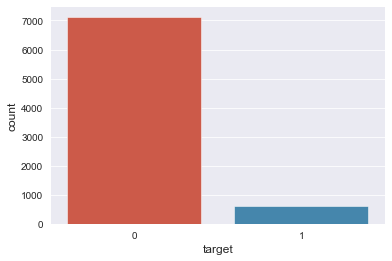

In [14]:
sns.countplot(train_df["target"])

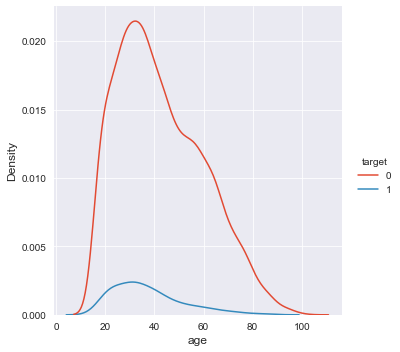

In [15]:
sns.displot( train_df , x = 'age', hue='target' , kind = 'kde')
plt.show()

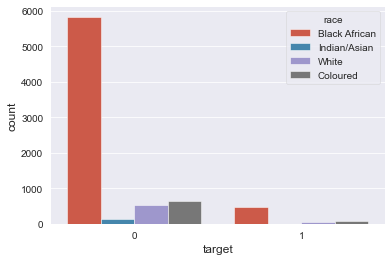

In [16]:
sns.countplot(x="target", hue='race', data=train_df)
plt.show()

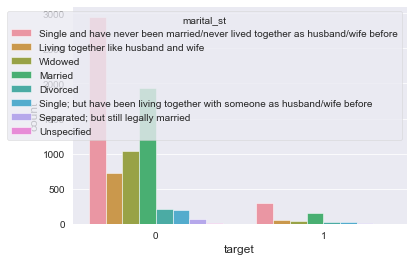

In [17]:
sns.countplot(x="target", hue='marital_st', data=train_df)
plt.show()

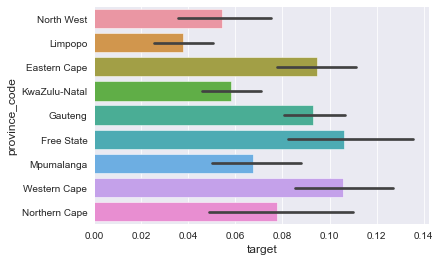

In [18]:
sns.barplot(x="target", y="province_code", data=train_df)
plt.show()

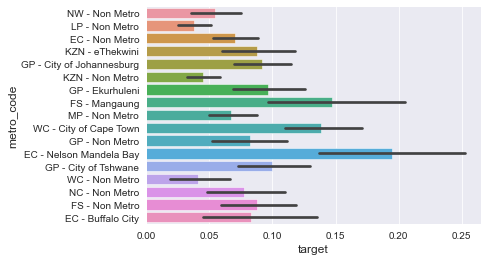

In [19]:
sns.barplot(x="target", y="metro_code", data=train_df)
plt.show()

### Data Preprocessing

In [20]:
all_data['age'].min()

16

In [21]:
# making age bins

all_data['Binned_Age'] =  pd.cut(x=all_data['age'], bins=[16, 25, 35, 45, 55, 65, 75, 85, 102])

In [22]:
all_data = all_data.drop(['ID','gender','psu','age'], axis =1)

In [23]:
all_data.columns

Index(['race', 'dwelling', 'dwelling_type', 'province_code', 'metro_code',
       'nationality', 'RTH', 'marital_st', 'Lang_inside', 'Lang_outside',
       'Education', 'lw_work', 'lw_business', 'help_on_household',
       'job_or_business', 'nature_of_work', 'target', 'train', 'Binned_Age'],
      dtype='object')

In [24]:
col = ['race', 'dwelling', 'dwelling_type', 'province_code',
       'metro_code', 'nationality', 'RTH', 'marital_st', 'Lang_inside',
       'Lang_outside', 'Education', 'lw_work', 'lw_business',
       'help_on_household', 'job_or_business', 'nature_of_work','Binned_Age']

all_data = pd.get_dummies(all_data, columns= col)

In [25]:
all_data.head()

,target,train,race_Black African,race_Coloured,race_Indian/Asian,race_White,dwelling_Caravan/tent,dwelling_Cluster house in complex,dwelling_Dwelling/house or brick/concrete block structure on a separate stand or yard or farm,dwelling_Dwelling/house/flat/room in backyard,...,nature_of_work_Temporary,nature_of_work_Unspecified,"Binned_Age_(16, 25]","Binned_Age_(25, 35]","Binned_Age_(35, 45]","Binned_Age_(45, 55]","Binned_Age_(55, 65]","Binned_Age_(65, 75]","Binned_Age_(75, 85]","Binned_Age_(85, 102]"
0,0.0,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0.0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
train_df = all_data[all_data['train']== 1]
test_df = all_data[all_data['train']== 0]

In [27]:
features = train_df.drop(['target','train'], axis=1)
label = train_df.target

In [28]:
import re
features = features.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

test_df = test_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [29]:
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size=0.33, random_state=42)

## MODEL BUILDING AND EVALUATION

### Model Building

In [30]:
cat_params = {'bagging_temperature': 0.5,
               'depth': 4,
               'iterations': 500,
               'l2_leaf_reg': 30,
               'learning_rate': 0.01,
               'random_strength': 0.6}

In [31]:
lgbm_params = {'boosting_type' : 'dart',
               'objective' : 'binary',
               'num_iterations': 500,
               'learning_rate': 0.01}

In [32]:
cat = CatBoostClassifier(**cat_params)
lgbm = LGBMClassifier(**lgbm_params)

classifier = [lgbm,cat]
classifier_names = ['LGBM','CAT']

In [33]:
def pred (model):
    for i, model in enumerate(classifier):
        model.fit(X_train,y_train)
        pred = model.predict_proba(X_val)[:,1]
        roc = roc_auc_score(y_val,pred)
        print(f'{classifier_names[i]}:{roc}')

In [34]:
pred(classifier)

LGBM:0.6276022986467644
0:	learn: 0.6825456	total: 163ms	remaining: 1m 21s
1:	learn: 0.6722798	total: 181ms	remaining: 45.1s
2:	learn: 0.6622724	total: 199ms	remaining: 33s
3:	learn: 0.6524967	total: 217ms	remaining: 26.9s
4:	learn: 0.6430323	total: 234ms	remaining: 23.2s
5:	learn: 0.6337408	total: 252ms	remaining: 20.7s
6:	learn: 0.6246742	total: 269ms	remaining: 18.9s
7:	learn: 0.6158602	total: 280ms	remaining: 17.2s
8:	learn: 0.6070825	total: 290ms	remaining: 15.8s
9:	learn: 0.5986711	total: 300ms	remaining: 14.7s
10:	learn: 0.5904293	total: 310ms	remaining: 13.8s
11:	learn: 0.5824568	total: 320ms	remaining: 13s
12:	learn: 0.5745440	total: 330ms	remaining: 12.3s
13:	learn: 0.5667779	total: 338ms	remaining: 11.7s
14:	learn: 0.5593627	total: 345ms	remaining: 11.2s
15:	learn: 0.5521494	total: 353ms	remaining: 10.7s
16:	learn: 0.5451119	total: 359ms	remaining: 10.2s
17:	learn: 0.5381553	total: 364ms	remaining: 9.75s
18:	learn: 0.5314452	total: 369ms	remaining: 9.34s
19:	learn: 0.5248748

192:	learn: 0.2667284	total: 1.21s	remaining: 1.93s
193:	learn: 0.2665924	total: 1.22s	remaining: 1.92s
194:	learn: 0.2664773	total: 1.22s	remaining: 1.91s
195:	learn: 0.2663580	total: 1.23s	remaining: 1.91s
196:	learn: 0.2662517	total: 1.24s	remaining: 1.9s
197:	learn: 0.2661577	total: 1.24s	remaining: 1.89s
198:	learn: 0.2660394	total: 1.24s	remaining: 1.88s
199:	learn: 0.2658906	total: 1.25s	remaining: 1.87s
200:	learn: 0.2657364	total: 1.25s	remaining: 1.86s
201:	learn: 0.2656211	total: 1.26s	remaining: 1.86s
202:	learn: 0.2654846	total: 1.26s	remaining: 1.85s
203:	learn: 0.2653508	total: 1.27s	remaining: 1.84s
204:	learn: 0.2652381	total: 1.27s	remaining: 1.83s
205:	learn: 0.2650782	total: 1.28s	remaining: 1.82s
206:	learn: 0.2649310	total: 1.28s	remaining: 1.82s
207:	learn: 0.2648064	total: 1.29s	remaining: 1.81s
208:	learn: 0.2646856	total: 1.29s	remaining: 1.8s
209:	learn: 0.2645633	total: 1.3s	remaining: 1.79s
210:	learn: 0.2644611	total: 1.3s	remaining: 1.78s
211:	learn: 0.26

352:	learn: 0.2557797	total: 2.06s	remaining: 856ms
353:	learn: 0.2557568	total: 2.06s	remaining: 850ms
354:	learn: 0.2557150	total: 2.06s	remaining: 844ms
355:	learn: 0.2556745	total: 2.07s	remaining: 838ms
356:	learn: 0.2556410	total: 2.08s	remaining: 832ms
357:	learn: 0.2556068	total: 2.08s	remaining: 826ms
358:	learn: 0.2555550	total: 2.09s	remaining: 819ms
359:	learn: 0.2554959	total: 2.09s	remaining: 813ms
360:	learn: 0.2554531	total: 2.1s	remaining: 807ms
361:	learn: 0.2554098	total: 2.1s	remaining: 801ms
362:	learn: 0.2553822	total: 2.11s	remaining: 795ms
363:	learn: 0.2553435	total: 2.11s	remaining: 789ms
364:	learn: 0.2552984	total: 2.12s	remaining: 783ms
365:	learn: 0.2552582	total: 2.12s	remaining: 776ms
366:	learn: 0.2552333	total: 2.13s	remaining: 770ms
367:	learn: 0.2551932	total: 2.13s	remaining: 764ms
368:	learn: 0.2551672	total: 2.13s	remaining: 758ms
369:	learn: 0.2551375	total: 2.14s	remaining: 752ms
370:	learn: 0.2551070	total: 2.14s	remaining: 746ms
371:	learn: 0.

## PREDICTION AND SUBMISSION

### Prediction

Two (2) models using LightGBMClassifier(62.76%),CatBoostClassifier(61.75%) were built and evaluated.

LightGBMClassifier was the best model with a higher roc_auc_score of 62.76%.

In [35]:
test_df.head()

,target,train,race_BlackAfrican,race_Coloured,race_IndianAsian,race_White,dwelling_Caravantent,dwelling_Clusterhouseincomplex,dwelling_Dwellinghouseorbrickconcreteblockstructureonaseparatestandoryardorfarm,dwelling_Dwellinghouseflatroominbackyard,...,nature_of_work_Temporary,nature_of_work_Unspecified,Binned_Age_1625,Binned_Age_2535,Binned_Age_3545,Binned_Age_4555,Binned_Age_5565,Binned_Age_6575,Binned_Age_7585,Binned_Age_85102
0,NaN,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,NaN,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,NaN,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,NaN,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,NaN,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
test_features = test_df.drop(['target','train'], axis =1)

In [37]:
#LGBMClassifier
lgbm.fit(features, label)
test_predi = lgbm.predict_proba(test_features)[:,1]

#CatBoostClassifier
#cat.fit(features, label)
#test_predi = cat.predict_proba(test_features)[:,1]

#vcf = VotingClassifier(estimators=[('lr', lgm),('cat',cat)], voting='soft')
#vcf.fit(X,y)
#test_predi = vcf.predict_proba(test_features)[:,1]

In [38]:
def plot_feat_Imp(model, X , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()

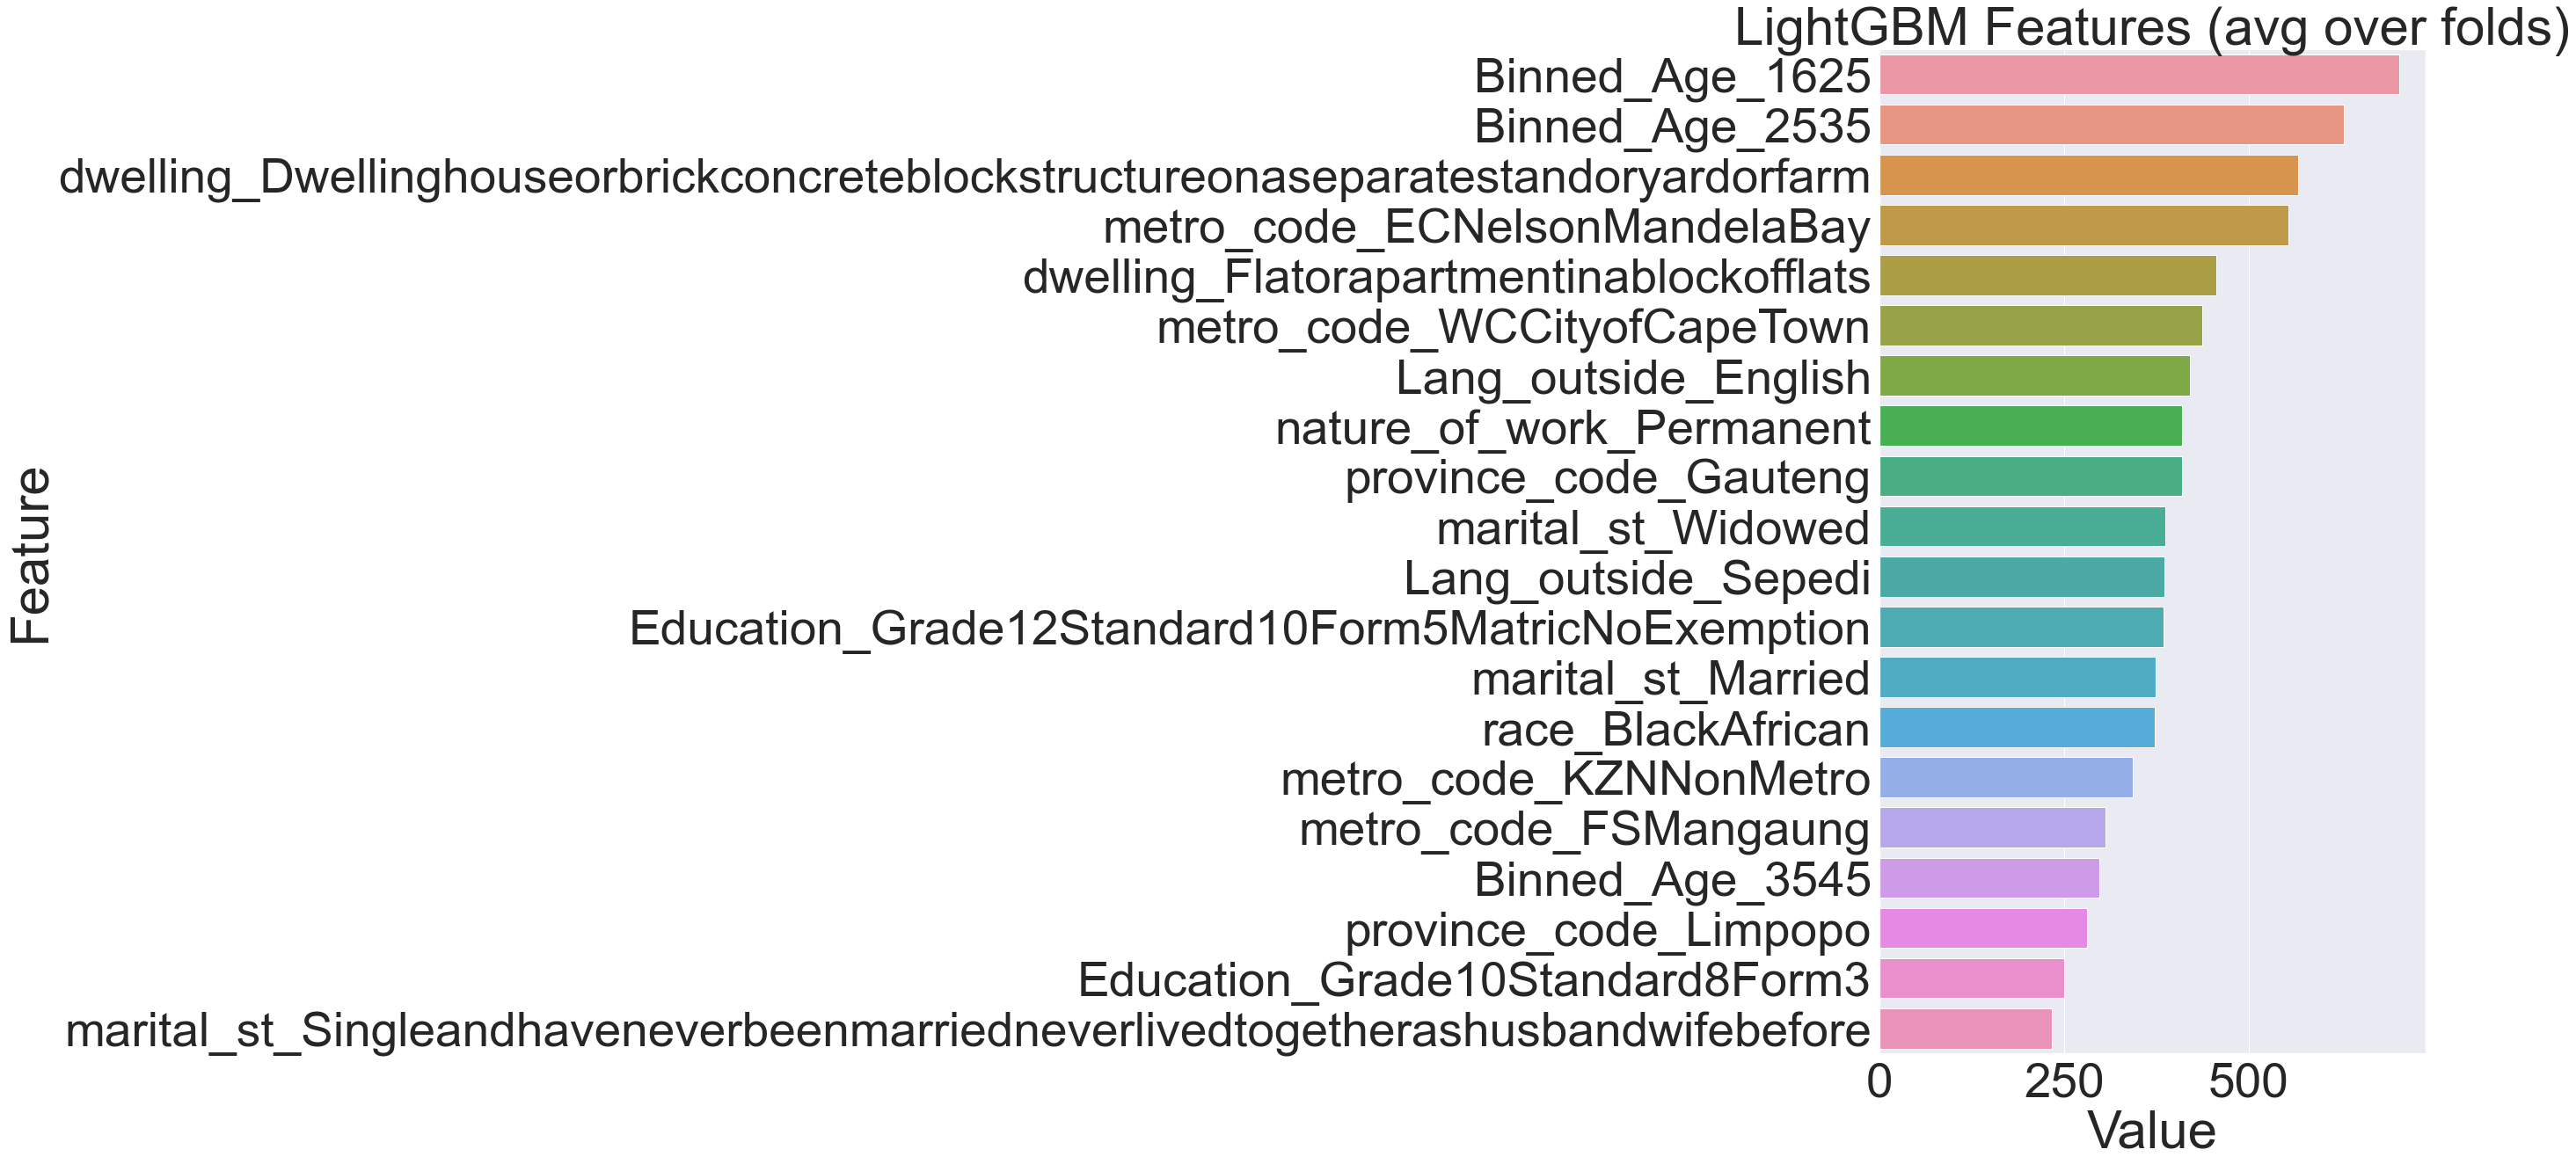

In [39]:
plot_feat_Imp(lgbm,features)

### Submission

In [40]:
final_sub = pd.DataFrame({'ID':test.ID,
                          'target': test_predi})
final_sub.to_csv('safety_sub7.csv', index = False)

print('Submission successfully saved...')

Submission successfully saved...


In [41]:
final_sub.head()

,ID,target
0,ID_00241643,0.127099
1,ID_00312043,0.103004
2,ID_00345323,0.180576
3,ID_00369643,0.129884
4,ID_00381163,0.161262
